Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Wasif Khan"
COLLABORATORS = "google colab" + "ChatGPT"

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [1]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "YOUR_API_KEY"

In [2]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 11, 12)
end = datetime.datetime(2018, 11, 12)

#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%%**********************]  1 of 1 completed


In [4]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'META']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%%**********************]  2 of 2 completed


In [ ]:
## TYPE YOUE CODE BELOW

In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
from pandas_datareader import data as pdr

import requests
import bs4
from bs4 import BeautifulSoup
from IPython.display import display

import numpy as np

from datetime import datetime, timedelta, timezone
import re
import json
from typing import List, Dict, Tuple, Optional, Union, Any, Set
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed
import pickle
import requests
import os

In [7]:
'''(2 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months. 
If you run into any issues downloading the data from online sources, you can use .csv files provided. 
This will not affect your grade for the assignment.'''

def get_data_from_yahoo():
    yf.pdr_override()
    
    start = dt.datetime(2018, 1, 1)      #start date
    end = dt.datetime.now()              #End date which is current
    tickers = ['META', 'MMM', 'IBM', 'AMZN']
    
    if not os.path.exists('stock_DATA'):
        os.makedirs('stock_DATA')
    
    for ticker in tickers:
        # just in case connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_DATA/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start = start, end= end, progress=False)
            df.to_csv('stock_DATA/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
get_data_from_yahoo()

Already have META
Already have MMM
Already have IBM
Already have AMZN


In [8]:
'''(3 points) Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.'''

df = pd.read_csv('./stock_DATA/AMZN.csv', parse_dates=True, index_col=0)
AMZN_m_e_c = df['Adj Close'].resample('BM').last()
AMZN_m_e_c.dropna(inplace=True)

print('AMZN prices for the 30 day monthly adujusted')
print(AMZN_m_e_c.tail())

df = pd.read_csv('./stock_DATA/META.csv', parse_dates=True, index_col=0)
META_m_e_c = df['Adj Close'].resample('BM').last()
META_m_e_c.dropna(inplace=True)

print('META prices for the 30 day monthly adujusted')
print(META_m_e_c.tail())

df = pd.read_csv('./stock_DATA/MMM.csv', parse_dates=True, index_col=0)
MMM_m_e_c= df['Adj Close'].resample('BM').last()
MMM_m_e_c.dropna(inplace=True)

print('MMM prices for the 30 day monthly adujusted')
print(MMM_m_e_c.tail())

df = pd.read_csv('./stock_DATA/IBM.csv', parse_dates=True, index_col=0)
IBM_m_e_c = df['Adj Close'].resample('BM').last()
IBM_m_e_c.dropna(inplace=True)

print('IBM prices for the 30 day monthly adujusted')
print(IBM_m_e_c.tail())

def compile_data():
    
    tickers = ['META', 'MMM', 'IBM', 'AMZN']

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('./stock_DATA/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')      #Joining all the Adjusted Close columns of all the stocks

        if count % 2 == 0:
            print(count)
    print(main_df.tail(10))
    main_df.to_csv('4Tickers_joined_closes.csv')


compile_data()

AMZN prices for the 30 day monthly adujusted
Date
2023-11-30    146.089996
2023-12-29    151.940002
2024-01-31    155.199997
2024-02-29    176.759995
2024-03-29    178.149994
Freq: BM, Name: Adj Close, dtype: float64
META prices for the 30 day monthly adujusted
Date
2023-11-30    326.803253
2023-12-29    353.584839
2024-01-31    389.726501
2024-02-29    490.130005
2024-03-29    507.760010
Freq: BM, Name: Adj Close, dtype: float64
MMM prices for the 30 day monthly adujusted
Date
2023-11-30     97.451347
2023-12-29    107.533882
2024-01-31     92.808464
2024-02-29     92.120003
2024-03-29    107.870003
Freq: BM, Name: Adj Close, dtype: float64
IBM prices for the 30 day monthly adujusted
Date
2023-11-30    157.127487
2023-12-29    162.072403
2024-01-31    182.000717
2024-02-29    185.029999
2024-03-29    191.899994
Freq: BM, Name: Adj Close, dtype: float64
0
2
                  META         MMM         IBM        AMZN
Date                                                      
2024-03-08  

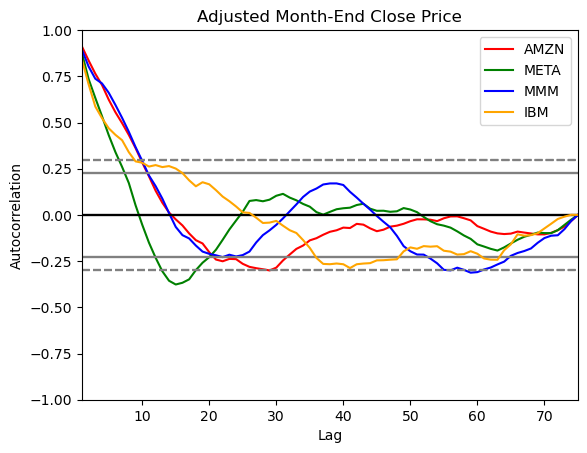

In [9]:
'''(3 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

Are they autocorrelated?
Provide short explanation.'''

data = {
    "AMZN": AMZN_m_e_c,
    "META": META_m_e_c,
    "MMM": MMM_m_e_c,
    "IBM": IBM_m_e_c,
}
df = pd.DataFrame(data)

# Create a list of colors for each stock
colors = ["red", "green", "blue", "orange"]
stock_name = ["AMZN",
    "META",
    "MMM",
    "IBM"]

# Plot the autocorrelation for each stock
for i, column in enumerate(df):
    pd.plotting.autocorrelation_plot(df[column], color=colors[i], label=stock_name[i])
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    
   
# Display the plots
plt.title('Adjusted Month-End Close Price')
plt.legend(handles=plt.gca().get_legend_handles_labels()[0])
plt.show()

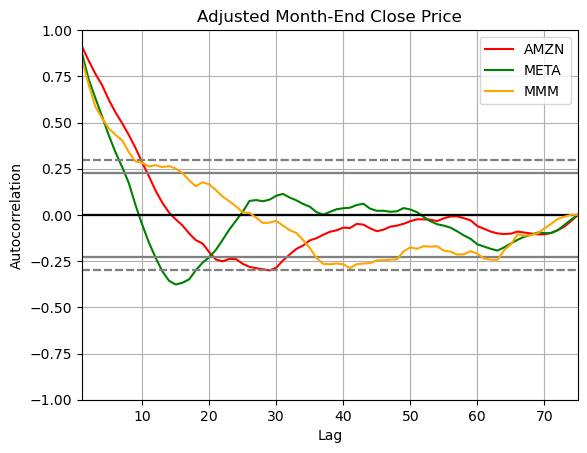

In [10]:
'''  ANS.
The shape of the autocorrelation plots: If the autocorrelation plots for two or more  stocks have a similar shape, 
it is an indication that the stocks are correlated.  

The height of the autocorrelation plots: If the autocorrelation plots for two stocks have a similar height, it is an indication that the stocks have 
a strong correlation.

The lag at which the autocorrelation plots cross zero: If the autocorrelation plots for two stocks cross zero at the same lag, it is an indication 
that the stocks are  positively correlated. If the autocorrelation plots for two stocks cross zero at different lags, it is an indication that the 
stocks are negatively correlated.


Based on the above discription;  All three technology stocks seem to be hihghly co-related while the '3M' stock which is a conglomorate is 
some what corelated but does tend to move oposite to technology stocks at certian instances.

'''

data = {
    "AMZN Stock": AMZN_m_e_c,
    "META Stock": META_m_e_c,
    "IBM Stock": IBM_m_e_c,
    
}
df = pd.DataFrame(data)

# Create a list of colors for each stock
colors = ["red", "green", "orange"]
stock_name = ["AMZN",
    "META",
    "MMM",
    "IBM"]

# Plot the autocorrelation for each stock
for i, column in enumerate(df):
    pd.plotting.autocorrelation_plot(df[column], color=colors[i], label=stock_name[i])
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")


# Display the plots
plt.title('Adjusted Month-End Close Price')
plt.legend(handles=plt.gca().get_legend_handles_labels()[0])
plt.show()

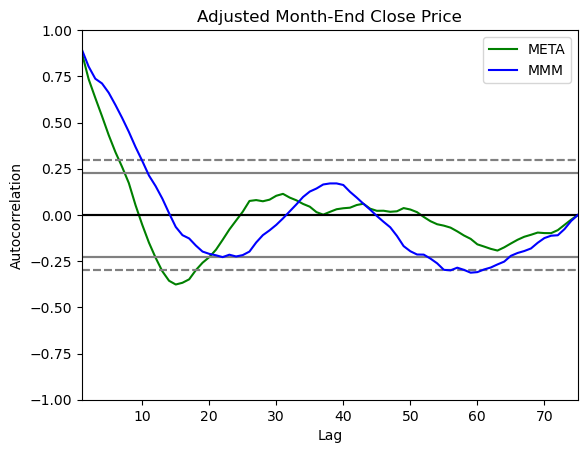

In [11]:
data = {
    
    "META Stock": META_m_e_c,
    "MMM Stock": MMM_m_e_c,
    
}
df = pd.DataFrame(data)

# Create a list of colors for each stock
colors = ["green", "blue"]
stock_name = ["META",
    "MMM"]

# Plot the autocorrelation for each stock
for i, column in enumerate(df):
    pd.plotting.autocorrelation_plot(df[column], color=colors[i], label=stock_name[i])
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    #plt.title(column)

# Display the plots
plt.title('Adjusted Month-End Close Price')
plt.legend(handles=plt.gca().get_legend_handles_labels()[0])
plt.show()



In [13]:


''' Ans.
If the autocorrelation plots for two stocks cross zero at the same lag, it is an indication that the stocks are positively correlated. 
If the autocorrelation plots for two stocks cross zero at different lags, it is an indication that the stocks are negatively correlated.  
It can be seen from the above graph that both META and 3M are somewhat negatively correlated as the graph for each crosses 0 at different lags 
historically however recently they seem to be moving in tandam'''


'If the autocorrelation plots for two stocks cross zero at the same lag, it is an indication that the stocks are positively correlated. \nIf the autocorrelation plots for two stocks cross zero at different lags, it is an indication that the stocks are negatively correlated.  \nIt can be seen from the above graph that both META and 3M are negatively correlated as the graph for each crosses 0 at different lags historically \nhowever lately they seem to be moving in tandam'

                AMZN      META       MMM       IBM
Date                                              
2018-02-28  0.042429 -0.045856 -0.054297 -0.038703
2018-03-30 -0.043049 -0.103914 -0.067895 -0.015401
2018-04-30  0.082075  0.076413 -0.114477 -0.055204
2018-05-31  0.040539  0.115000  0.021549 -0.014358
2018-06-29  0.043065  0.013244 -0.002586 -0.011393
...              ...       ...       ...       ...
2023-11-30  0.097678  0.085903  0.106421  0.108671
2023-12-29  0.040044  0.081950  0.103462  0.031471
2024-01-31  0.021456  0.102215 -0.136937  0.122959
2024-02-29  0.138918  0.257626 -0.007418  0.016644
2024-03-29  0.007864  0.035970  0.170973  0.037129

[74 rows x 4 columns]


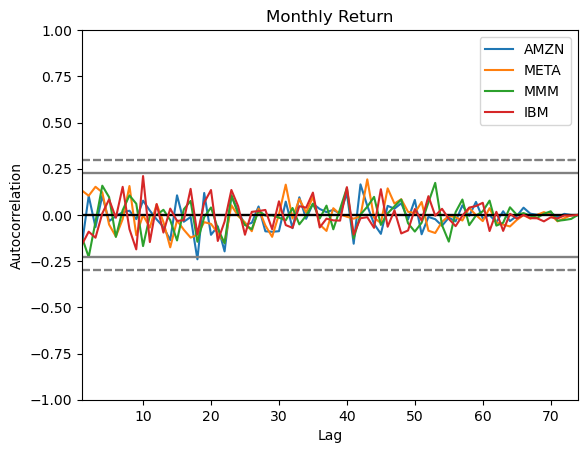

In [28]:

'''Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.
Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.
Are the returns autocorrelated? Provide short explanation.'''

# Create a DataFrame with adjusted month-end close prices for each stock
data = {
    "AMZN": AMZN_m_e_c,
    "META": META_m_e_c,
    "MMM": MMM_m_e_c,
    "IBM": IBM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

# Plot the autocorrelation of the monthly returns
for column in df_returns:
    pd.plotting.autocorrelation_plot(df_returns[column], label=str(column))
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    #plt.title(column)

# Display the plots

plt.title('Monthly Return')
plt.legend();
plt.show()



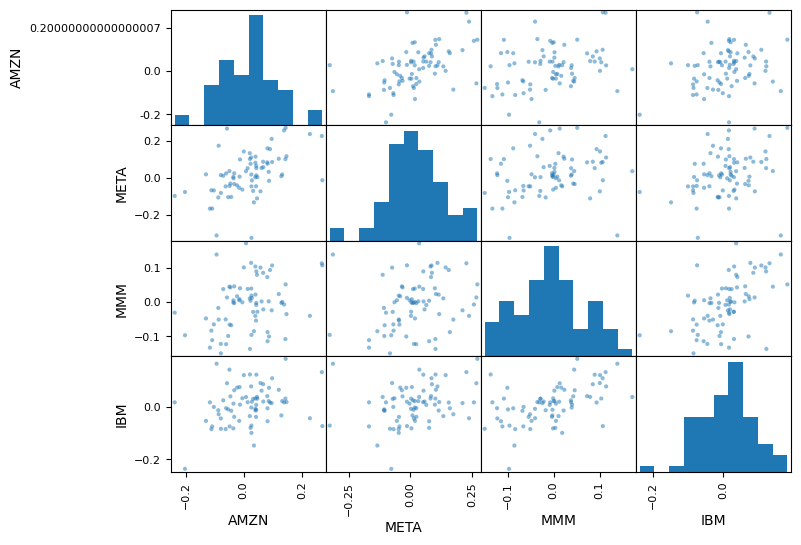

'# Plot the scatter plot matrix with different colors for each stock\nscatter_matrix = pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns.columns, cmap=\'tab10\')\n'

In [37]:
'''Combine all 4 time series (returns) into a single DataFrame,
Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).
Explain the results. Is there any correlation?'''

# Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix
pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist")
plt.show()



'''# Plot the scatter plot matrix with different colors for each stock
scatter_matrix = pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns.columns, cmap='tab10')
'''

In [ ]:
''' Ans. 
To explain the returns shown in the scatter plot matrix and confirm if there are any correlations, one has to look at the following:

The direction of the scatter plot: If the scatter plot for a pair of stocks slopes upwards, it indicates that the returns for those two stocks tend to move in the 
same direction. If the scatter plot slopes downwards, it indicates that the returns for those two stocks tend to move in opposite directions.

The tightness of the scatter plot: If the scatter plot for a pair of stocks is tight, it indicates that the returns for those two stocks tend to move in the 
same direction by a similar amount. If the scatter plot is loose, it indicates that the returns for those two stocks tend to move in the same direction by a 
varying amount.

The presence of any outliers: If there are any outliers in the scatter plot for a pair of stocks, it indicates that the returns for those two stocks have moved 
in opposite directions at some point in time.

Based on these observations, one can make the following conclusions about the correlations between the returns of the 4 stocks under consideration:

AMZN and META: The scatter plot for both the stocks slopes upwards and is relatively tight. This indicates that the returns for these two stocks tend to move 
in the same direction by a similar amount.  Also the monthly retrun of these stocks have a larger band i.e. 20% vs IBM and 3M this shows that they are alot more 
volatile. 

IBM and 3M: The scatter plot of both these stocks are relatively tight and does have a clear direction, although we see some outliers suggesting they have moved in opposit
direction. However in general this indicates that the returns for these two stocks does have a strong correlation.

META and 3M: The scatter plot for both these stocks slopes downwards and is relatively loose. This indicates that the returns for these two stocks tend to 
move in opposite directions by a relatively similar amount, also we can note outliers indicating opposite direction movement at some point.

Overall, the scatter plot matrix shows that there is a positive correlation between the returns of AMZN, META and IBM, and a negative correlation between the returns 
of AMZN + Meta and 3M. There is no clear correlation between the returns of IBM and 3M. '''



            AMZN Stock  MMM Stock
Date                             
2018-02-28    0.042429  -0.054297
2018-03-30   -0.043049  -0.067895
2018-04-30    0.082075  -0.114477
2018-05-31    0.040539   0.021549
2018-06-29    0.043065  -0.002586
...                ...        ...
2023-11-30    0.097678   0.106421
2023-12-29    0.040044   0.103462
2024-01-31    0.021456  -0.136937
2024-02-29    0.138918  -0.007418
2024-03-29    0.007864   0.170973

[74 rows x 2 columns]


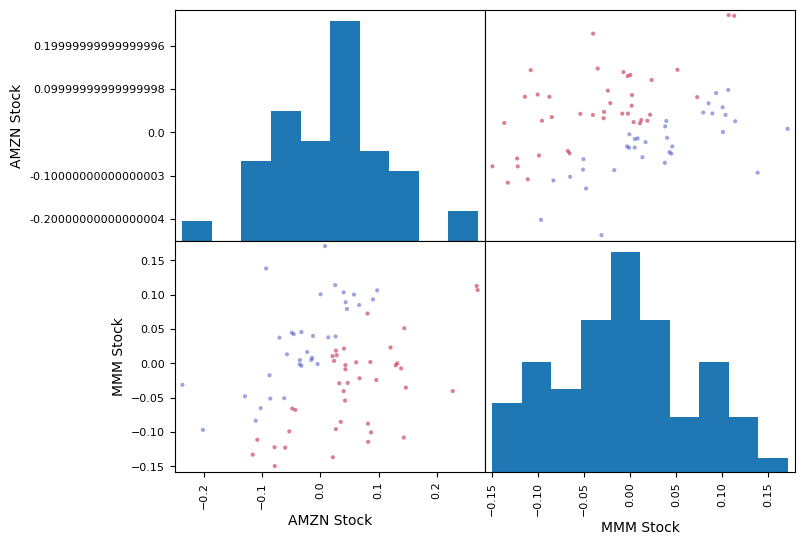

In [24]:

data = {
    "AMZN Stock": AMZN_m_e_c,
    "MMM Stock": MMM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

# Plot scatter matrix with different colors for AMZN and MMM returns
pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns['AMZN Stock'] > df_returns['MMM Stock'], cmap='coolwarm')

plt.show()

            AMZN Stock  META Stock
Date                              
2018-02-28    0.042429   -0.045856
2018-03-30   -0.043049   -0.103914
2018-04-30    0.082075    0.076413
2018-05-31    0.040539    0.115000
2018-06-29    0.043065    0.013244
...                ...         ...
2023-11-30    0.097678    0.085903
2023-12-29    0.040044    0.081950
2024-01-31    0.021456    0.102215
2024-02-29    0.138918    0.257626
2024-03-29    0.007864    0.035970

[74 rows x 2 columns]


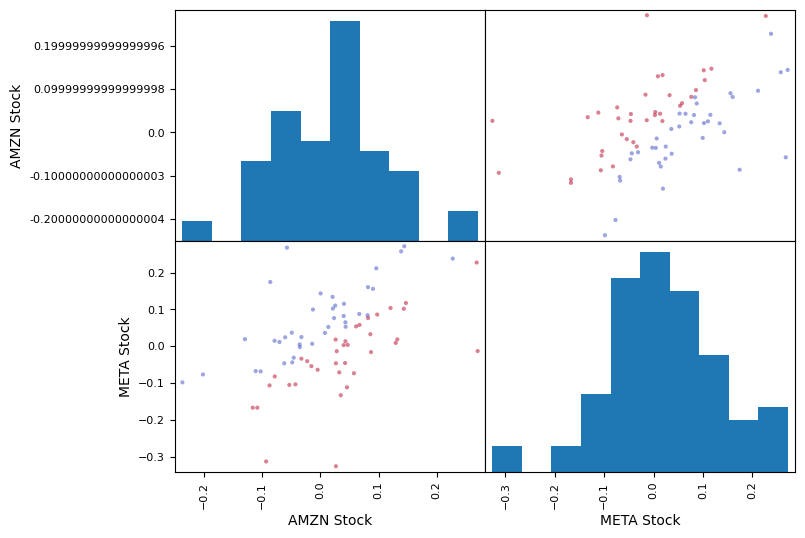

In [38]:
data = {
    "AMZN Stock": AMZN_m_e_c,
    "META Stock": META_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist",c=df_returns['AMZN Stock'] > df_returns['META Stock'], cmap='coolwarm')
plt.show()


            AMZN Stock  IBM Stock
Date                             
2018-02-28    0.042429  -0.038703
2018-03-30   -0.043049  -0.015401
2018-04-30    0.082075  -0.055204
2018-05-31    0.040539  -0.014358
2018-06-29    0.043065  -0.011393
...                ...        ...
2023-11-30    0.097678   0.108671
2023-12-29    0.040044   0.031471
2024-01-31    0.021456   0.122959
2024-02-29    0.138918   0.016644
2024-03-29    0.007864   0.037129

[74 rows x 2 columns]


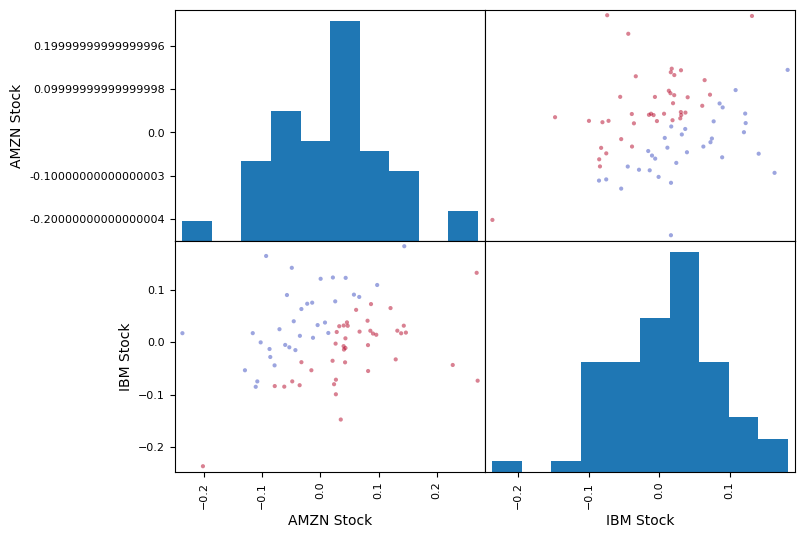

In [40]:
'''The scatter plot for AMZN Stock and META Stock slopes upwards and is relatively tight. 
This indicates that the returns for these two stocks tend to move in the same direction by a similar amount/frequency.'''



data = {
    "AMZN Stock": AMZN_m_e_c,
    "IBM Stock": IBM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns['AMZN Stock'] > df_returns['IBM Stock'], cmap='coolwarm')
plt.show()

            IBM Stock  MMM Stock
Date                            
2018-02-28  -0.038703  -0.054297
2018-03-30  -0.015401  -0.067895
2018-04-30  -0.055204  -0.114477
2018-05-31  -0.014358   0.021549
2018-06-29  -0.011393  -0.002586
...               ...        ...
2023-11-30   0.108671   0.106421
2023-12-29   0.031471   0.103462
2024-01-31   0.122959  -0.136937
2024-02-29   0.016644  -0.007418
2024-03-29   0.037129   0.170973

[74 rows x 2 columns]


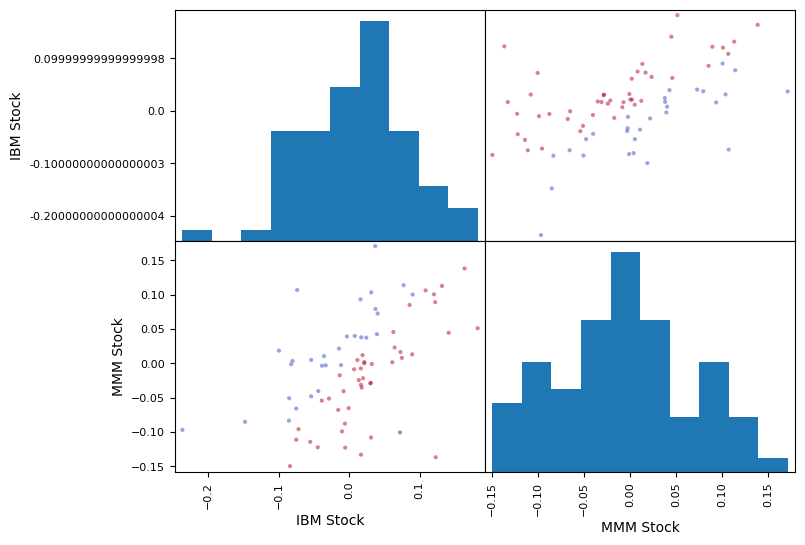

In [39]:
'''The scatter plot for AMZN Stock and IBM Stock is somewhat clustured together and does have a direction slopeing upwards. 
This indicates that the returns for these two stocks do have a correlation.'''


data = {
    "IBM Stock": IBM_m_e_c,
    "MMM Stock": MMM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns['IBM Stock'] > df_returns['MMM Stock'], cmap='coolwarm')
plt.show()

In [22]:
'''The scatter plot for IBM Stock and 3M Stock slopes upwards and is relatively tight. 
This indicates that the returns for these two stocks tend to move in the same direction by a similar frequency.  Although few ouliers can be noticed.'''

'The scatter plot for IBM Stock and 3M Stock slopes upwards and is relatively tight. \nThis indicates that the returns for these two stocks tend to move in the same direction by a similar frequency.'

            META Stock  MMM Stock
Date                             
2018-02-28   -0.045856  -0.054297
2018-03-30   -0.103914  -0.067895
2018-04-30    0.076413  -0.114477
2018-05-31    0.115000   0.021549
2018-06-29    0.013244  -0.002586
...                ...        ...
2023-11-30    0.085903   0.106421
2023-12-29    0.081950   0.103462
2024-01-31    0.102215  -0.136937
2024-02-29    0.257626  -0.007418
2024-03-29    0.035970   0.170973

[74 rows x 2 columns]


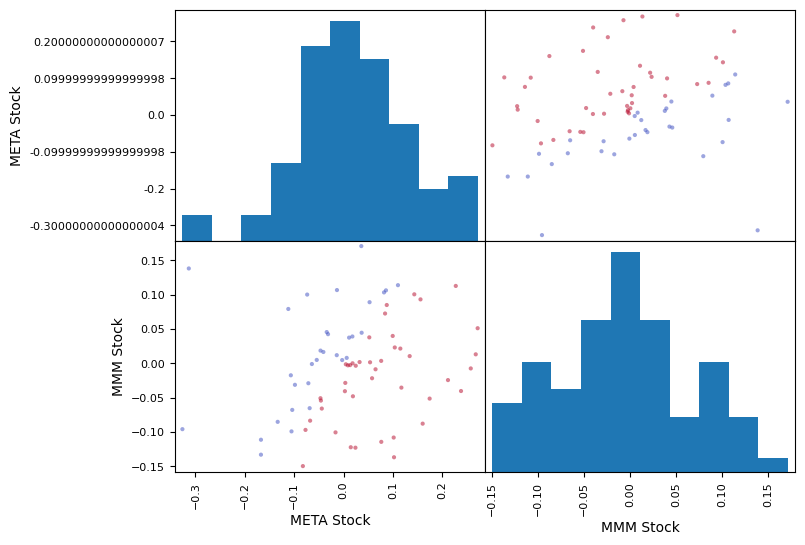

In [41]:
data = {
    "META Stock": META_m_e_c,
    "MMM Stock": MMM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns['META Stock'] > df_returns['MMM Stock'], cmap='coolwarm')
plt.show()

            META Stock  IBM Stock
Date                             
2018-02-28   -0.045856  -0.038703
2018-03-30   -0.103914  -0.015401
2018-04-30    0.076413  -0.055204
2018-05-31    0.115000  -0.014358
2018-06-29    0.013244  -0.011393
...                ...        ...
2023-11-30    0.085903   0.108671
2023-12-29    0.081950   0.031471
2024-01-31    0.102215   0.122959
2024-02-29    0.257626   0.016644
2024-03-29    0.035970   0.037129

[74 rows x 2 columns]


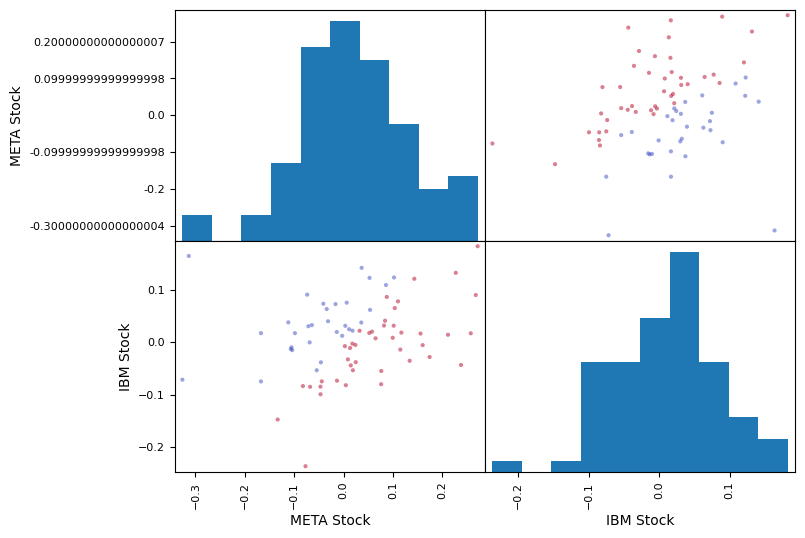

In [42]:
data = {
    "META Stock": META_m_e_c,
    "IBM Stock": IBM_m_e_c,
}
df = pd.DataFrame(data)
#print(df.head())

# Calculate the monthly returns using the "shift trick"
df_returns = (df / df.shift(1)) - 1
df_returns.dropna(inplace=True)
print(df_returns)

pd.plotting.scatter_matrix(df_returns, figsize=(8, 6), diagonal="hist", c=df_returns['META Stock'] > df_returns['IBM Stock'], cmap='coolwarm')
plt.show()